In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.set_random_seed(777) # reproducibility

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [7]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

In [8]:
# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

In [9]:
hypothesis = tf.matmul(X, W) + b

In [10]:
# define cost/loss & optimizer
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits = hypothesis, labels = tf.stop_gradient(Y)
    )
)
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [11]:
correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Epoch: 0001, Cost: 5.745170981
Epoch: 0002, Cost: 1.780056713
Epoch: 0003, Cost: 1.122778646
Epoch: 0004, Cost: 0.872012256
Epoch: 0005, Cost: 0.738203186
Epoch: 0006, Cost: 0.654728892
Epoch: 0007, Cost: 0.596023618
Epoch: 0008, Cost: 0.552216828
Epoch: 0009, Cost: 0.518254969
Epoch: 0010, Cost: 0.491113205
Epoch: 0011, Cost: 0.468347537
Epoch: 0012, Cost: 0.449374358
Epoch: 0013, Cost: 0.432675663
Epoch: 0014, Cost: 0.418828160
Epoch: 0015, Cost: 0.406128937
Epoch: 0016, Cost: 0.394982944
Epoch: 0017, Cost: 0.385870423
Epoch: 0018, Cost: 0.376135588
Epoch: 0019, Cost: 0.368269382
Epoch: 0020, Cost: 0.361209781
Epoch: 0021, Cost: 0.354798143
Epoch: 0022, Cost: 0.348525124
Epoch: 0023, Cost: 0.342752728
Epoch: 0024, Cost: 0.337285911
Epoch: 0025, Cost: 0.332443598
Epoch: 0026, Cost: 0.327556533
Epoch: 0027, Cost: 0.324047230
Epoch: 0028, Cost: 0.319670900
Epoch: 0029, Cost: 0.315536206
Epoch: 0030, Cost: 0.312257757
Epoch: 0031, Cost: 0.308550810
Epoch: 0032, Cost: 0.305987611
Epoch: 0

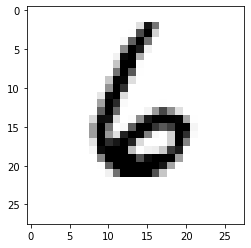

In [12]:
# train my model
with tf.Session() as sess:
  # initialize
  sess.run(tf.global_variables_initializer())

  for epoch in range(num_epochs):
    avg_cost = 0

    for iteration in range(num_iterations):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      _, cost_val = sess.run([train, cost], feed_dict = {X: batch_xs, Y: batch_ys})
      avg_cost += cost_val / num_iterations
      
    print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")
    
  print("Learning Finished!")

  # Test model and check accuracy
  print(
      "Accuracy:",
      sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}),
  )

  # Get one and predict
  r = random.randint(0, mnist.test.num_examples - 1)

  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], axis = 1)))
  print(
      "Prediction: ",
      sess.run(
          tf.argmax(hypothesis, axis = 1), feed_dict = {X: mnist.test.images[r:r + 1]}
      ),
  )

  plt.imshow(
      mnist.test.images[r:r + 1].reshape(28, 28),
      cmap = "Greys",
      interpolation = "nearest",
  )
  plt.show()